In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set({'figure.figsize':[9,9]},)

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df = pd.concat([df_train,df_test])
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [3]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# Domain knowledge :

<span class="mark"> Gender:  </span> Gender of the passengers (Female, Male)

<span class="mark"> Customer Type: </span> The customer type (Loyal customer, disloyal customer)

<span class="mark"> Age: </span> The actual age of the passengers

<span class="mark"> Type of Travel: </span> Purpose of the flight of the passengers (Personal Travel, Business Travel)

<span class="mark"> Class: </span> Travel class in the plane of the passengers (Business, Eco, Eco Plus)

<span class="mark"> Flight distance: </span> The flight distance of this journey

<span class="mark"> Inflight wifi service: </span> Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

<span class="mark"> Departure/Arrival time convenient: </span> Satisfaction level of Departure/Arrival time convenient

<span class="mark"> Ease of Online booking: </span> Satisfaction level of online booking

<span class="mark"> Gate location: </span> Satisfaction level of Gate location

<span class="mark"> Food and drink: </span> Satisfaction level of Food and drink

<span class="mark"> Online boarding: </span> Satisfaction level of online boarding

<span class="mark"> Seat comfort: </span> Satisfaction level of Seat comfort

<span class="mark"> Inflight entertainment: </span> Satisfaction level of inflight entertainment

<span class="mark"> On-board service: </span> Satisfaction level of On-board service

<span class="mark"> Leg room service: </span> Satisfaction level of Leg room service

<span class="mark"> Baggage handling: </span> Satisfaction level of baggage handling

<span class="mark"> Check-in service: </span> Satisfaction level of Check-in service

<span class="mark"> Inflight service: </span> Satisfaction level of inflight service

<span class="mark"> Cleanliness: </span> Satisfaction level of Cleanliness

<span class="mark"> Departure Delay in Minutes: </span> Minutes delayed when departure

<span class="mark"> Arrival Delay in Minutes: </span> Minutes delayed when Arrival

<span class="mark"> Satisfaction: </span> Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

# Unmamed:0 and ID

In [5]:
df['Unnamed: 0'].describe()

count    129880.000000
mean      44158.700000
std       31207.377062
min           0.000000
25%       16234.750000
50%       38963.500000
75%       71433.250000
max      103903.000000
Name: Unnamed: 0, dtype: float64

In [6]:
df.drop(['Unnamed: 0','id'],inplace=True,axis=1)

# Gender

In [7]:
df['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [8]:
df['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

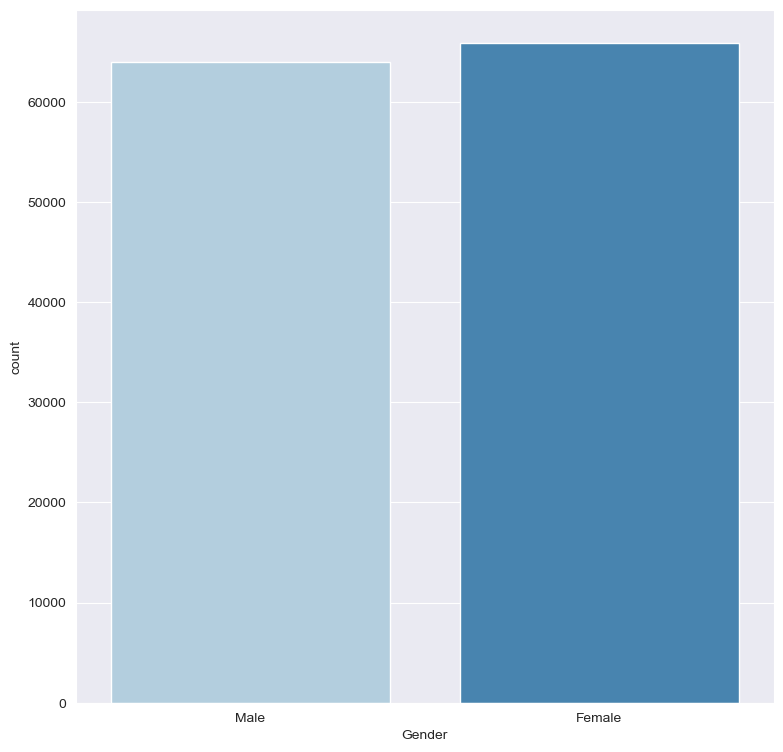

In [9]:
sns.countplot(x='Gender',data=df,palette='Blues')

# customer type

In [10]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [11]:
df['Customer Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

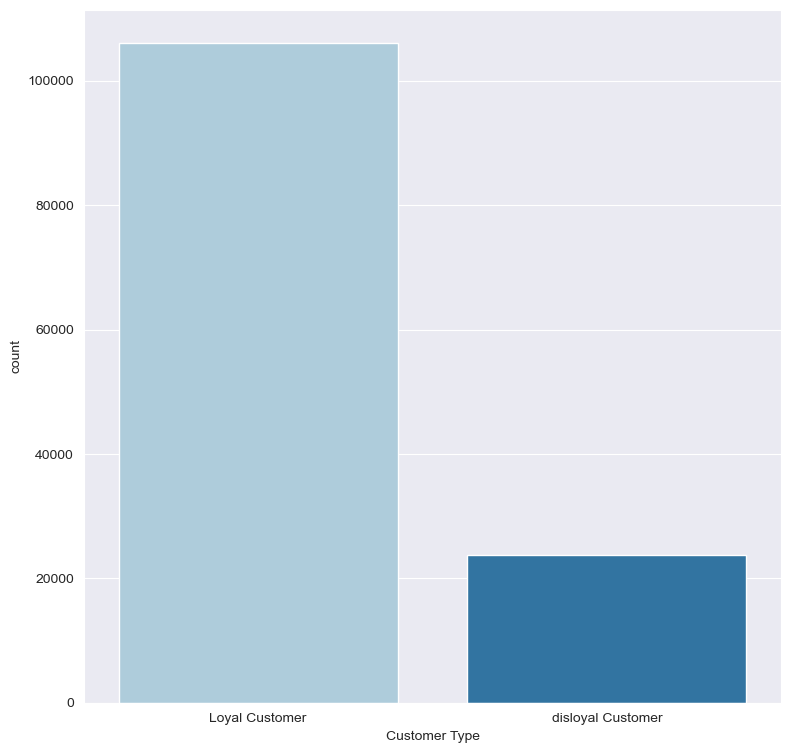

In [12]:
sns.countplot(x='Customer Type',data=df,palette='Paired')

# Age

In [13]:
np.sort(df['Age'].unique())

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 85], dtype=int64)

In [14]:
df['Age'].describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

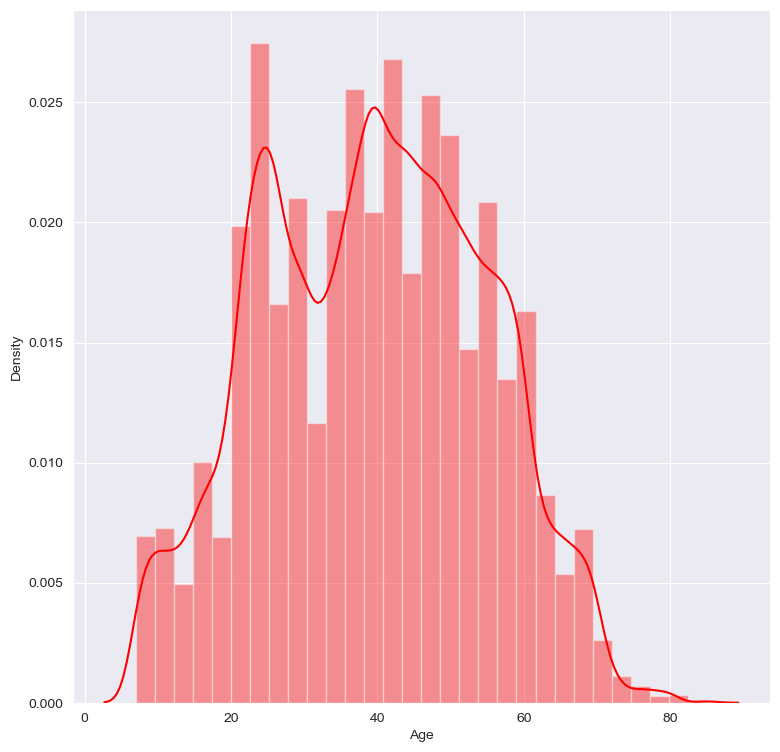

In [15]:
#sns.kdeplot(df['Age'],shade=True)
#df['Age'].plot(kind = 'kde', figsize = (20, 10))-->for normal disrtibution 
sns.distplot(df['Age'], color='red' , bins=30)

# Type of Travel

In [16]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

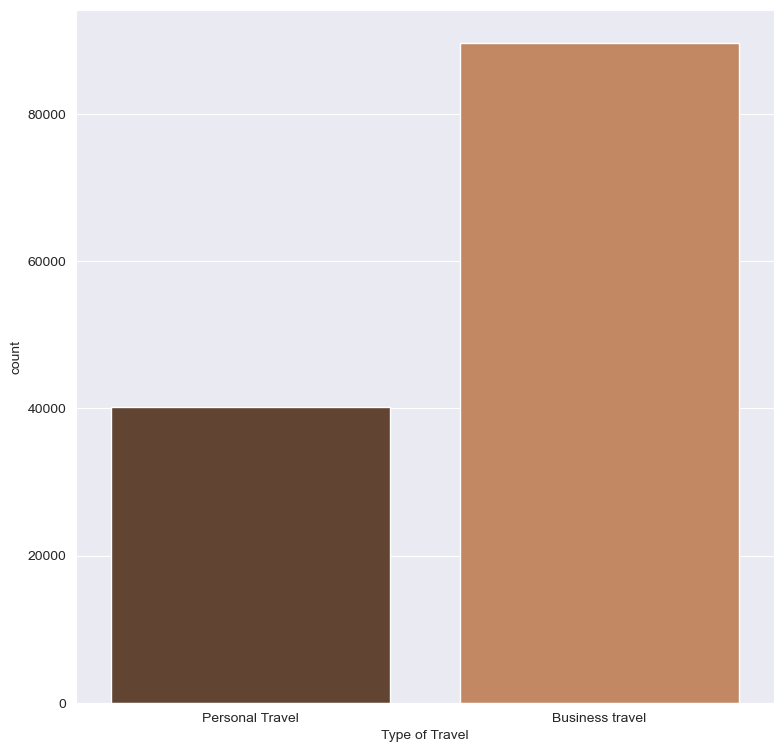

In [17]:
sns.countplot(x='Type of Travel', data=df, palette='copper')

# Class

In [18]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

<AxesSubplot:xlabel='Class', ylabel='count'>

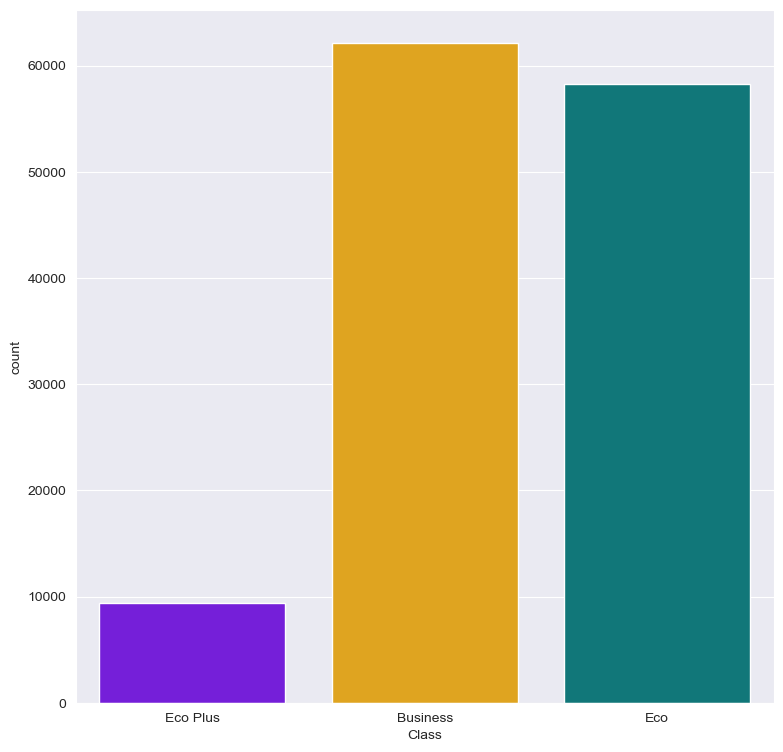

In [19]:
sns.countplot(x='Class', data=df, palette='prism_r')

# Flight Distance

In [20]:
df['Flight Distance'].describe()


count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: Flight Distance, dtype: float64

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight Distance', ylabel='Density'>

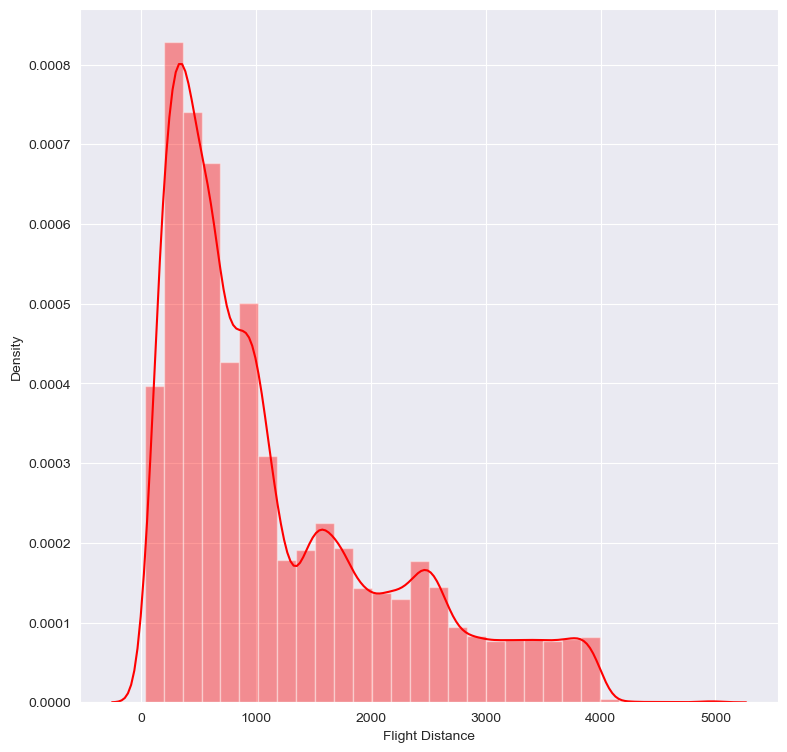

In [21]:
#sns.kdeplot(df['Flight Distance'],shade=True)
sns.distplot(df['Flight Distance'], color='red' , bins=30)

<AxesSubplot:xlabel='Flight Distance'>

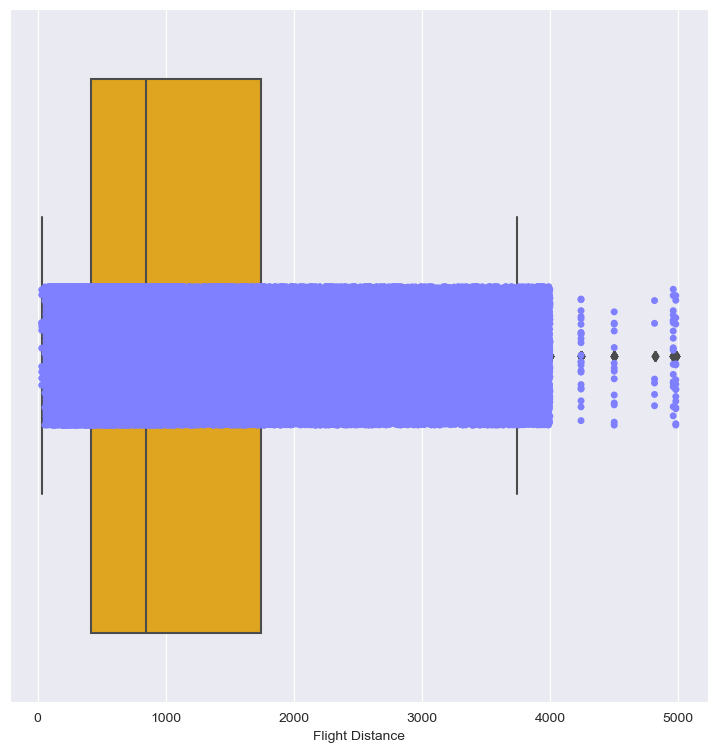

In [22]:
sns.boxplot(x='Flight Distance', data=df, palette='prism_r')
sns.stripplot(x='Flight Distance', data=df, palette='cool_r')

In [23]:
q1=df['Flight Distance'].quantile(0.25)
q3=df['Flight Distance'].quantile(0.75)
q2=q3-q1#iqr
min_whisker = q1 - 1.5 * q2
max_whisker = q3 + 1.5 * q2
max_whisker

3739.0

In [24]:
clean=df[df['Flight Distance'].between(min_whisker,max_whisker)]
outliers=df[~df['Flight Distance'].between(min_whisker,max_whisker)]



In [25]:
clean

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [26]:
outliers

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
80,Male,Loyal Customer,26,Business travel,Business,3960,1,1,1,1,...,4,4,2,5,4,4,4,45,48.0,satisfied
173,Male,Loyal Customer,52,Business travel,Business,3747,5,5,5,5,...,4,4,4,4,5,4,5,24,20.0,satisfied
201,Female,Loyal Customer,43,Business travel,Business,3854,5,5,5,5,...,5,5,5,5,5,5,3,0,0.0,satisfied
215,Female,Loyal Customer,38,Business travel,Business,3753,2,2,2,2,...,4,4,4,4,4,4,1,0,0.0,satisfied
379,Male,Loyal Customer,46,Business travel,Business,3995,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25704,Male,Loyal Customer,49,Business travel,Business,4963,1,1,1,1,...,4,4,3,4,4,4,4,23,0.0,satisfied
25796,Female,Loyal Customer,29,Business travel,Business,3840,3,3,3,3,...,5,3,3,4,3,1,5,0,0.0,satisfied
25874,Female,Loyal Customer,51,Business travel,Business,3904,4,4,4,4,...,4,4,4,4,4,4,4,0,0.0,satisfied
25891,Male,Loyal Customer,44,Business travel,Business,3857,1,1,1,1,...,4,4,4,4,3,4,4,0,5.0,satisfied


<AxesSubplot:xlabel='Flight Distance'>

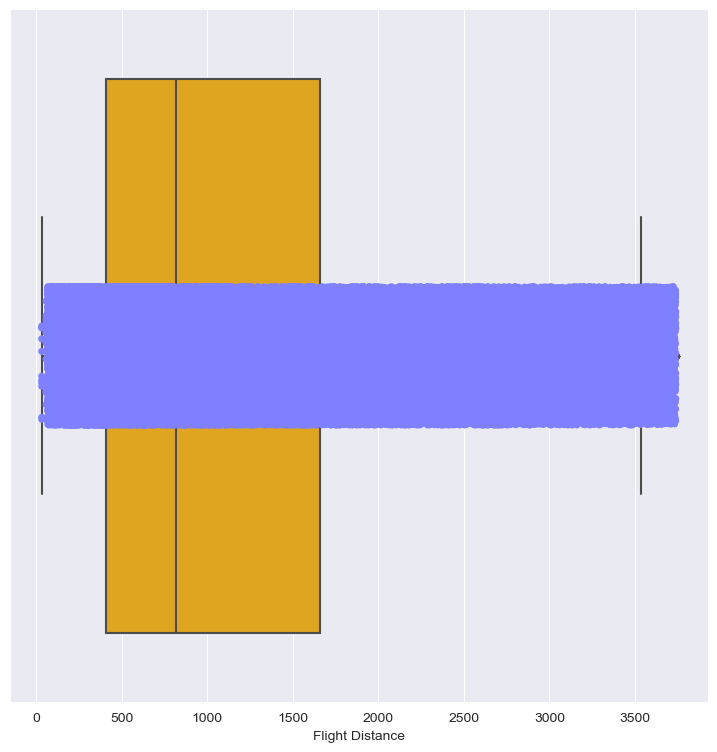

In [27]:
sns.boxplot(x='Flight Distance', data=clean, palette='prism_r')
sns.stripplot(x='Flight Distance', data=clean, palette='cool_r')

In [28]:
df.drop(outliers.index,inplace=True)
df



,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


# Inflight wifi service

In [29]:
df['Inflight wifi service'].describe()


count    125899.000000
mean          2.727726
std           1.326378
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Inflight wifi service, dtype: float64

In [30]:
df['Inflight wifi service'].unique()


array([3, 2, 4, 1, 5, 0], dtype=int64)

<AxesSubplot:xlabel='Inflight wifi service', ylabel='count'>

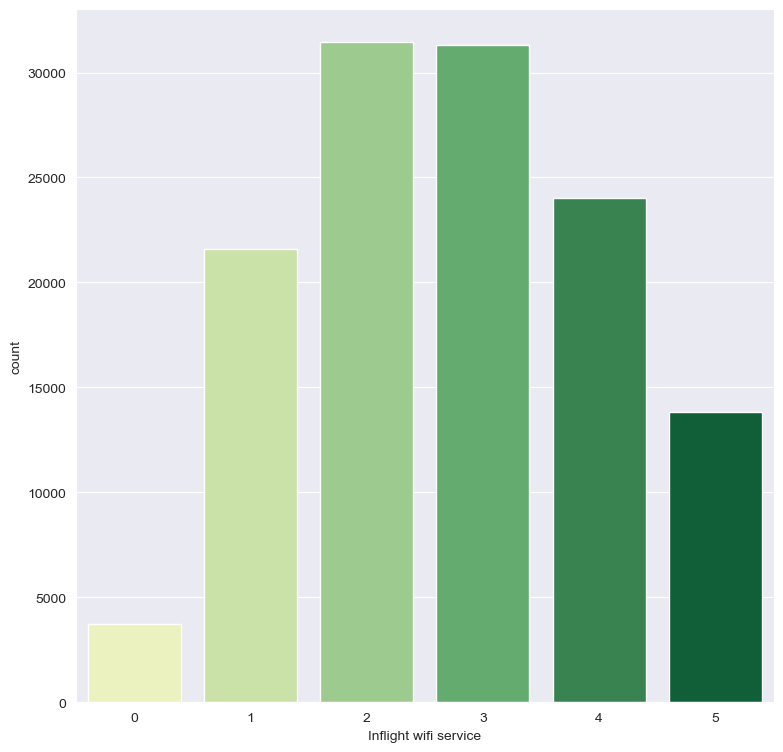

In [31]:
sns.countplot(x='Inflight wifi service', data=df, palette='YlGn')

<AxesSubplot:xlabel='Inflight wifi service'>

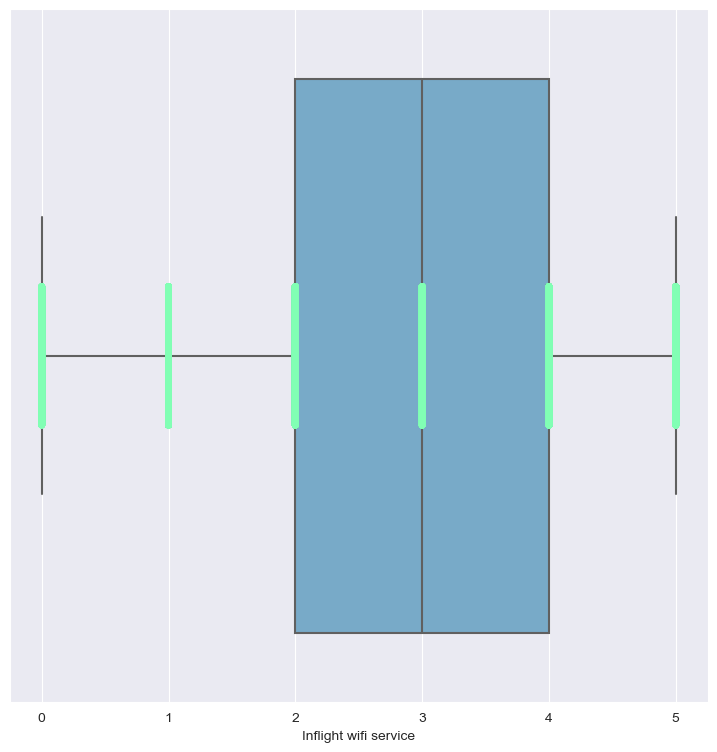

In [32]:
sns.boxplot(x='Inflight wifi service', data=df, palette='Blues')
sns.stripplot(x='Inflight wifi service', data=df, palette='rainbow')

# Departure/Arrival time convenient

In [33]:
df['Departure/Arrival time convenient'].describe()


count    125899.000000
mean          3.060874
std           1.527217
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Departure/Arrival time convenient, dtype: float64

In [34]:
df['Departure/Arrival time convenient'].unique()

array([4, 2, 5, 3, 1, 0], dtype=int64)

<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='count'>

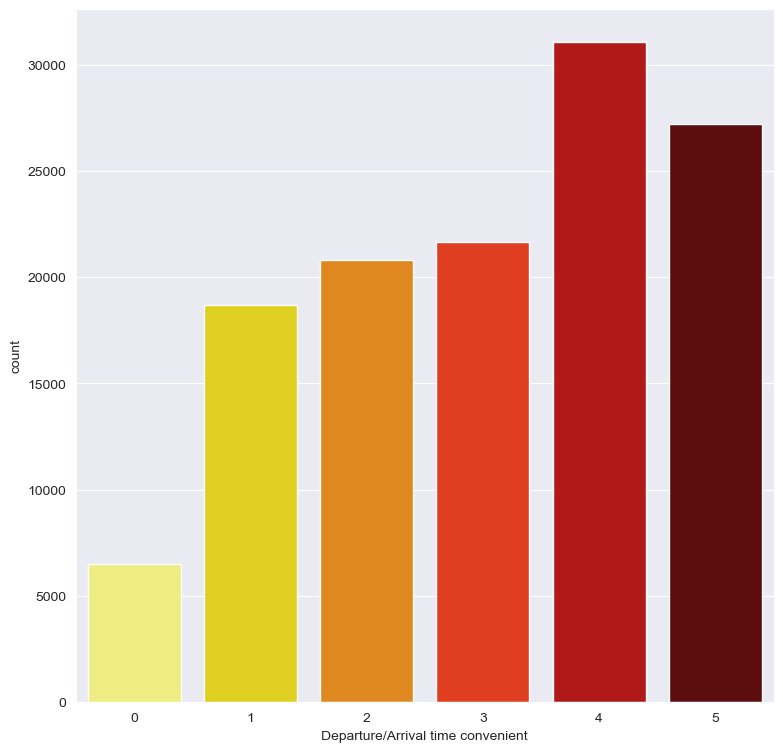

In [35]:
sns.countplot(x='Departure/Arrival time convenient', data=df, palette='hot_r')

<AxesSubplot:xlabel='Departure/Arrival time convenient'>

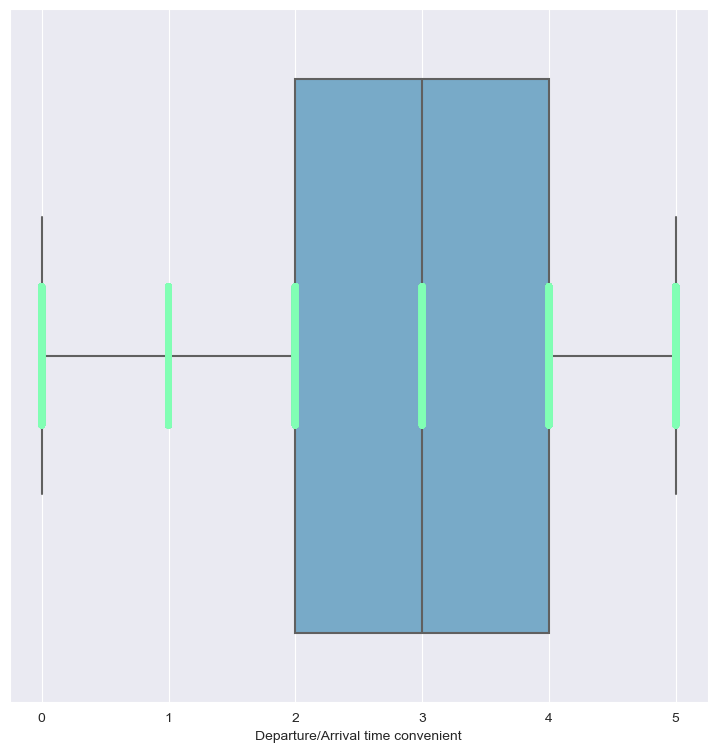

In [36]:
sns.boxplot(x='Departure/Arrival time convenient', data=df, palette='Blues')
sns.stripplot(x='Departure/Arrival time convenient', data=df, palette='rainbow')

In [37]:
df.columns


Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# Ease of Online booking

In [38]:
df['Ease of Online booking'].describe()


count    125899.000000
mean          2.753533
std           1.399064
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Ease of Online booking, dtype: float64

In [39]:
df['Ease of Online booking'].unique()

array([3, 2, 5, 4, 1, 0], dtype=int64)

<AxesSubplot:xlabel='Ease of Online booking', ylabel='count'>

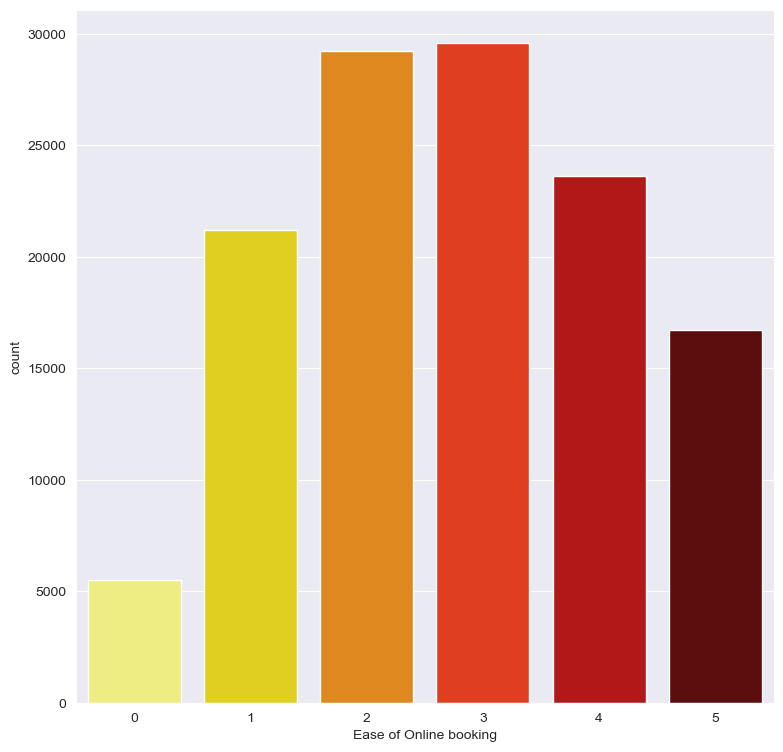

In [40]:
sns.countplot(x='Ease of Online booking', data=df, palette='hot_r')

<AxesSubplot:xlabel='Ease of Online booking'>

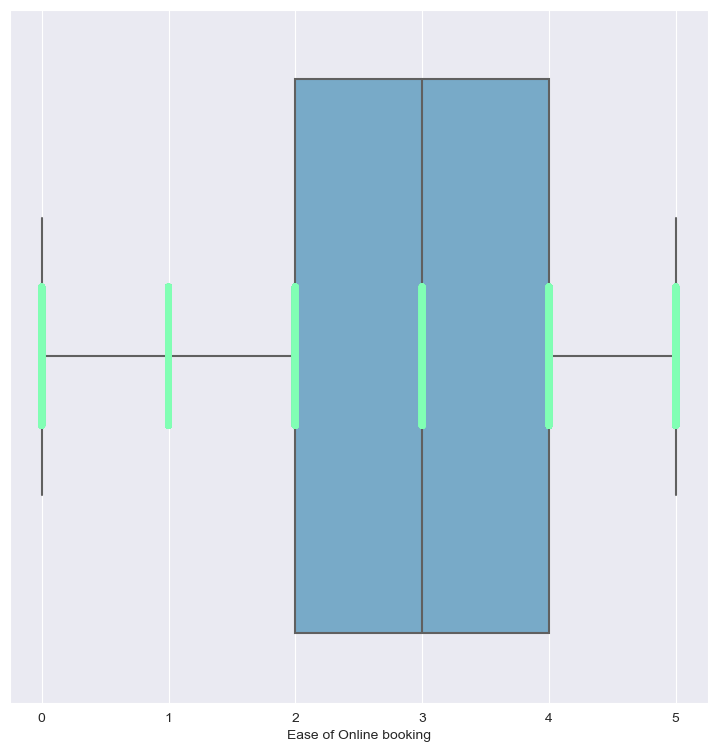

In [41]:
sns.boxplot(x='Ease of Online booking', data=df, palette='Blues')
sns.stripplot(x='Ease of Online booking', data=df, palette='rainbow')

# Gate location 

In [42]:
df['Gate location'].unique()


array([1, 3, 2, 5, 4, 0], dtype=int64)

In [43]:
df['Gate location'].describe()

count    125899.000000
mean          2.976974
std           1.275583
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: Gate location, dtype: float64

<AxesSubplot:xlabel='Gate location', ylabel='count'>

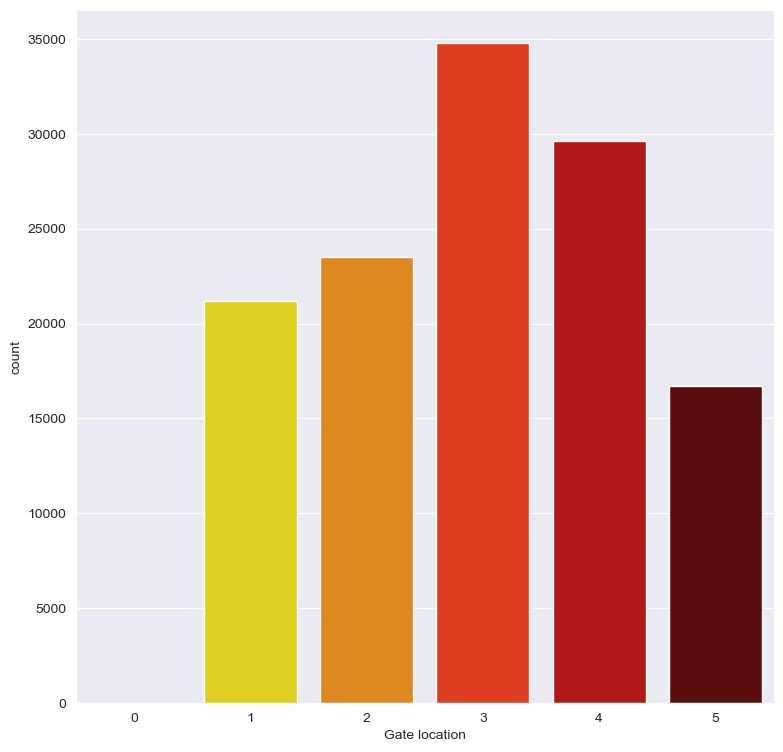

In [44]:
sns.countplot(x='Gate location', data=df, palette='hot_r')

<AxesSubplot:xlabel='Gate location'>

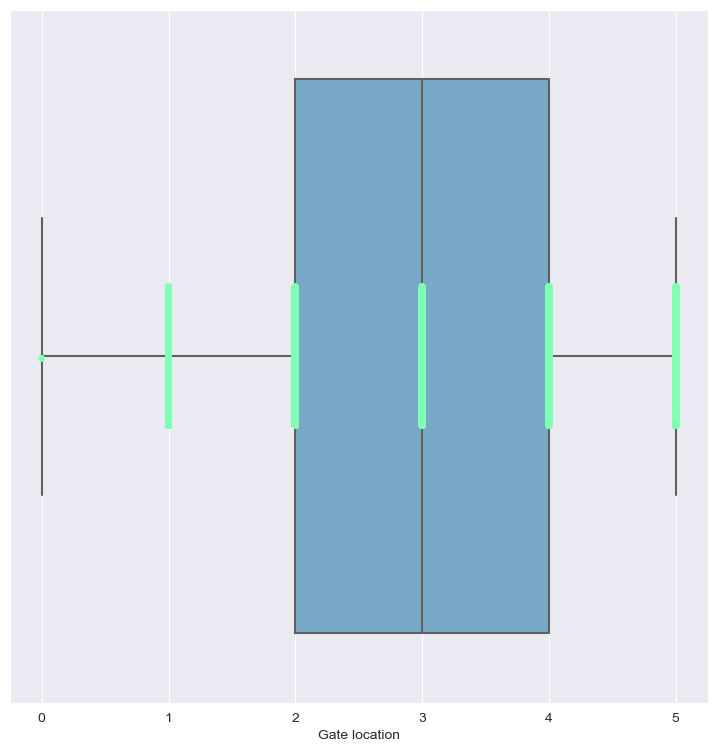

In [45]:
sns.boxplot(x='Gate location', data=df, palette='Blues')
sns.stripplot(x='Gate location', data=df, palette='rainbow')

## Food and drink

In [46]:
df['Food and drink'].unique()

array([5, 1, 2, 4, 3, 0], dtype=int64)

In [47]:
df['Food and drink'].value_counts()

4    29559
5    27051
3    26895
2    26563
1    15704
0      127
Name: Food and drink, dtype: int64

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Food and drink', ylabel='count'>

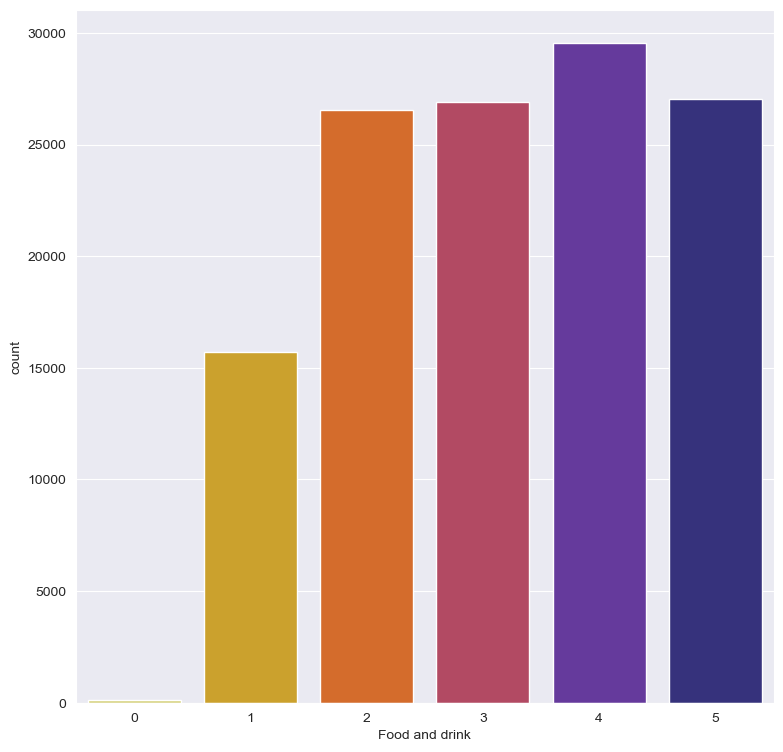

In [48]:
sns.countplot(df['Food and drink'] , palette='CMRmap_r')

## Online boarding

In [49]:
df['Online boarding'].unique()

array([3, 5, 2, 1, 4, 0], dtype=int64)

In [50]:
df['Online boarding'].value_counts()

4    36909
3    26525
5    24880
2    21518
1    13016
0     3051
Name: Online boarding, dtype: int64

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Online boarding', ylabel='count'>

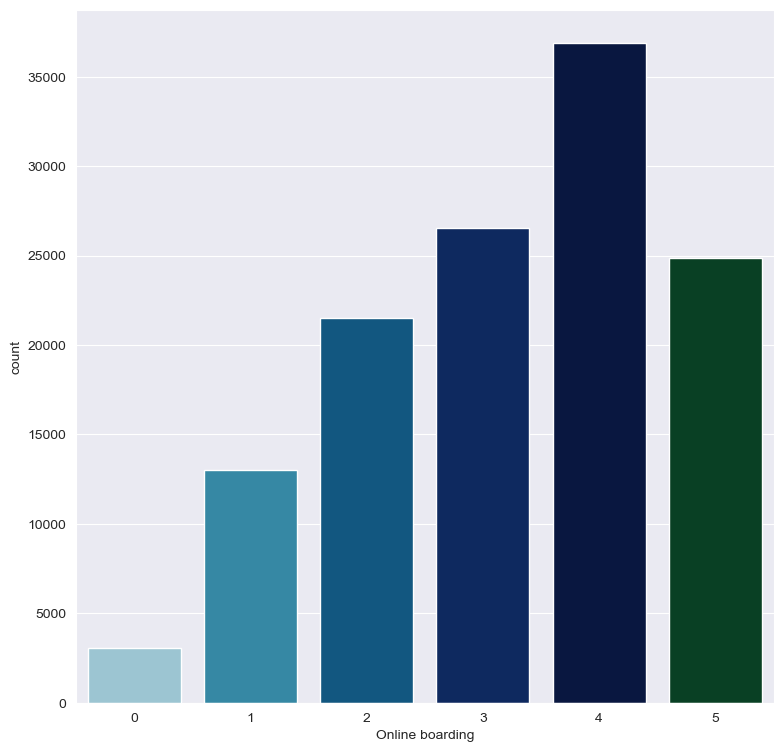

In [51]:
sns.countplot(df['Online boarding'] , palette='ocean_r')

## Seat comfort

In [52]:
df['Seat comfort'].unique()

array([5, 1, 2, 3, 4, 0], dtype=int64)

In [53]:
df['Seat comfort'].value_counts()

4    38256
5    31904
3    22737
2    18151
1    14850
0        1
Name: Seat comfort, dtype: int64

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seat comfort', ylabel='count'>

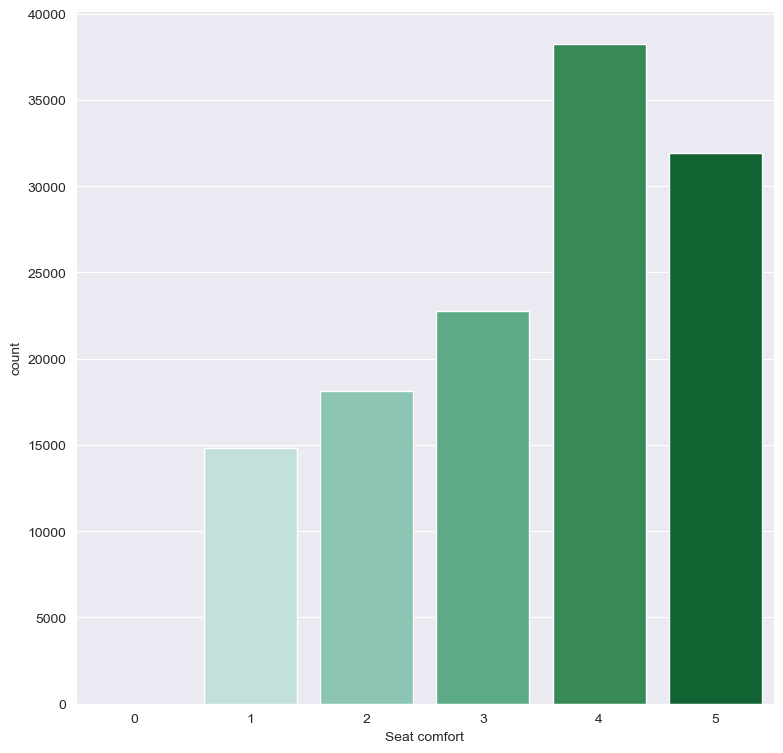

In [54]:
sns.countplot(df['Seat comfort'] , palette='BuGn')

## Inflight entertainment

In [55]:
df['Inflight entertainment'].unique()

array([5, 1, 2, 3, 4, 0], dtype=int64)

In [56]:
df['Inflight entertainment'].value_counts()

4    35414
5    30367
3    23211
2    21485
1    15405
0       17
Name: Inflight entertainment, dtype: int64

## On-board service

In [57]:
df['On-board service'].unique()

array([4, 1, 2, 3, 5, 0], dtype=int64)

In [58]:
df['On-board service'].value_counts()

4    37340
5    28396
3    27802
2    17900
1    14457
0        4
Name: On-board service, dtype: int64

## Leg room service

In [59]:
df['Leg room service'].unique()

array([3, 5, 4, 2, 1, 0], dtype=int64)

In [60]:
df['Leg room service'].value_counts()

4    34519
5    29757
3    24444
2    23990
1    12599
0      590
Name: Leg room service, dtype: int64

## Baggage handling

In [61]:
df['Baggage handling'].unique()

array([4, 3, 5, 1, 2], dtype=int64)

In [62]:
df['Baggage handling'].value_counts()

4    45261
5    32685
3    25178
2    13975
1     8800
Name: Baggage handling, dtype: int64

In [63]:
df['Checkin service'].unique()

array([4, 1, 3, 5, 2, 0], dtype=int64)

In [64]:
df['Checkin service'].value_counts()

4    35162
3    34350
5    24965
2    15711
1    15710
0        1
Name: Checkin service, dtype: int64

## Inflight service

In [65]:
df['Inflight service'].unique()

array([5, 4, 3, 1, 2, 0], dtype=int64)

In [66]:
df['Inflight service'].value_counts()

4    45834
5    32870
3    24626
2    13907
1     8658
0        4
Name: Inflight service, dtype: int64

## Cleanliness

In [67]:
df['Cleanliness'].unique()

array([5, 1, 2, 3, 4, 0], dtype=int64)

In [68]:
df['Cleanliness'].value_counts()

4    32781
3    29606
5    27449
2    19687
1    16362
0       14
Name: Cleanliness, dtype: int64

## Departure Delay in Minutes

In [69]:
df['Departure Delay in Minutes'].describe()

count    125899.000000
mean         14.681594
std          38.002864
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

<AxesSubplot:xlabel='Departure Delay in Minutes'>

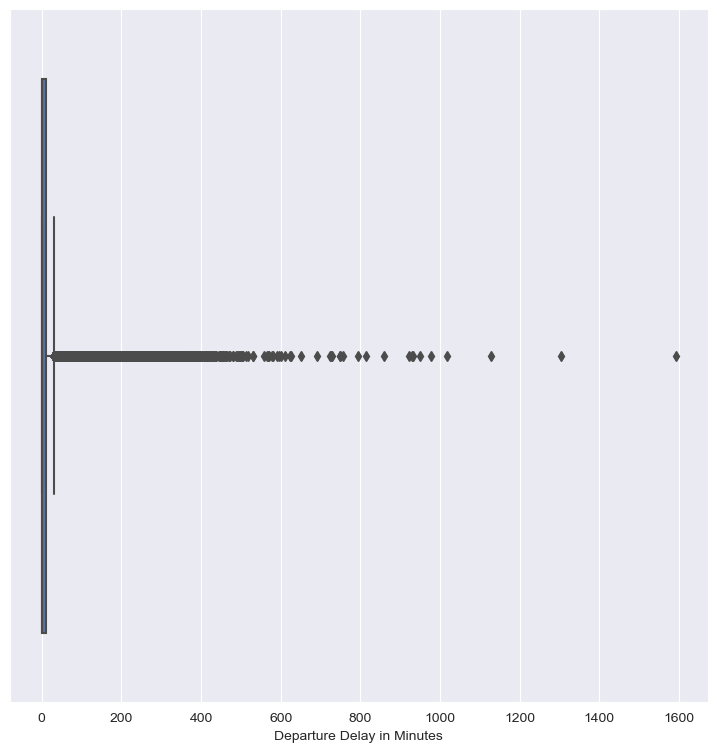

In [70]:
sns.boxplot(x='Departure Delay in Minutes' ,data=df )

<AxesSubplot:ylabel='Density'>

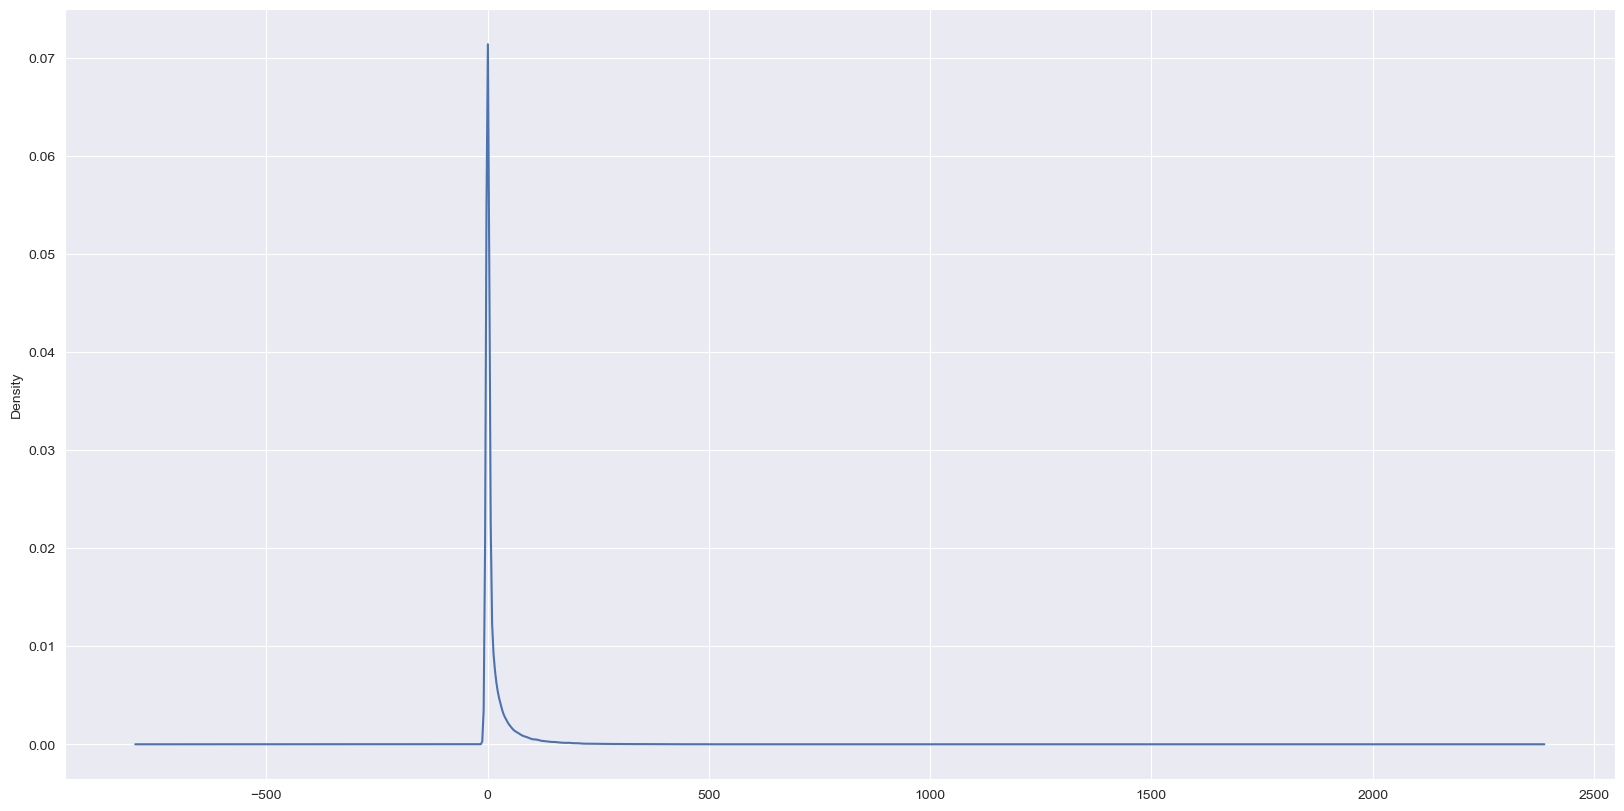

In [71]:
df['Departure Delay in Minutes'].plot(kind = 'kde', figsize = (20, 10))

In [72]:
# q1 = df['Departure Delay in Minutes'].quantile(0.25)
# q3 = df['Departure Delay in Minutes'].quantile(0.75)
# iqr = q3 - q1
# lower_whisker = q1 - 1.5 * iqr
# upper_whisker = q3 + 1.5 * iqr
# lower_whisker, upper_whisker

In [73]:
# filt = (df['Departure Delay in Minutes'] < lower_whisker) | (df['Departure Delay in Minutes'] > upper_whisker)
# filt.sum()

## Arrival Delay in Minutes

In [74]:
df['Arrival Delay in Minutes'].describe()

count    125521.000000
mean         15.071271
std          38.410410
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

In [75]:
df['Arrival Delay in Minutes'].isna().sum()

378

In [76]:
#work with missingvalue
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df['Arrival Delay in Minutes'] = imputer.fit_transform(df[['Arrival Delay in Minutes']])


In [77]:
df['Arrival Delay in Minutes'].isna().sum()

0

## satisfaction

In [78]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

C:\Users\sarah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

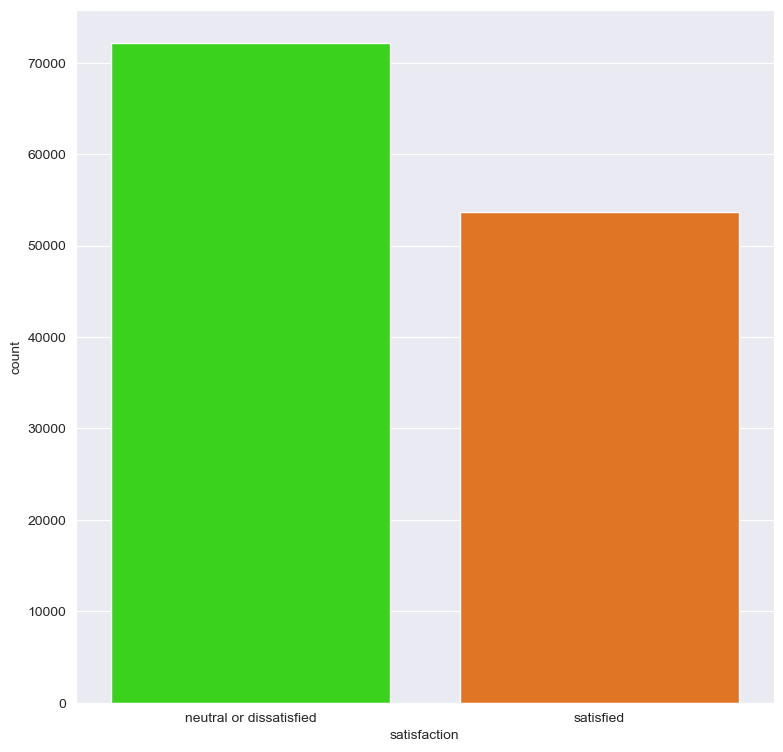

In [79]:
sns.countplot(df['satisfaction'] , palette='gist_ncar')

<h1 style="color:red"> DATA PREPROCESSING </h1>

- work with categorigal data

# Gender 


In [80]:
df = pd.get_dummies(df , columns=['Gender' , 'Customer Type' ,'Type of Travel' ,'satisfaction'] , drop_first=True)


In [81]:
df

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied
0,13,Eco Plus,460,3,4,3,1,5,3,5,...,4,4,5,5,25,18.0,1,0,1,0
1,25,Business,235,3,2,3,3,1,3,1,...,3,1,4,1,1,6.0,1,1,0,0
2,26,Business,1142,2,2,2,2,5,5,5,...,4,4,4,5,0,0.0,0,0,0,1
3,25,Business,562,2,5,5,5,2,2,2,...,3,1,4,2,11,9.0,0,0,0,0
4,61,Business,214,3,3,3,3,4,5,5,...,4,3,3,3,0,0.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,Business,526,3,3,3,1,4,3,4,...,4,4,5,4,0,0.0,1,1,0,0
25972,23,Business,646,4,4,4,4,4,4,4,...,5,5,5,4,0,0.0,1,0,0,1
25973,17,Eco,828,2,5,1,5,2,1,2,...,4,5,4,2,0,0.0,0,0,1,0
25974,14,Business,1127,3,3,3,3,4,4,4,...,5,4,5,4,0,0.0,1,0,0,1


In [82]:
#pd.pivot_table(data=df , index='Age' , values='satisfaction' ,aggfunc='count')-->for gategorical with categorical


In [83]:
Class_dict = {'Business':0, 
        'Eco':1,
        'Eco Plus':2}

# apply using map
df['Class'] = df['Class'].map(Class_dict)


In [84]:
x = df.drop('satisfaction_satisfied',axis=1)
y = df['satisfaction_satisfied']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x , y , test_size=0.1)

In [86]:
X_train

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
26437,16,1,937,1,4,1,3,1,1,1,...,4,5,4,4,1,0,0.0,1,0,1
23670,31,0,2641,2,2,2,2,5,5,5,...,4,5,4,4,5,0,0.0,1,0,0
57400,30,0,725,3,3,3,3,4,4,4,...,5,4,3,5,4,0,1.0,1,0,0
27381,20,1,369,3,3,3,1,2,3,2,...,2,1,3,4,2,0,0.0,1,1,0
44602,36,1,1176,3,3,3,3,3,3,3,...,3,4,2,4,3,30,65.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4707,36,0,468,3,3,3,3,3,1,1,...,4,5,1,5,1,157,135.0,0,1,0
12346,24,1,591,5,4,5,5,5,4,5,...,2,5,4,4,5,0,0.0,0,1,0
39920,51,0,1679,0,0,0,4,2,5,5,...,2,2,4,2,3,0,0.0,1,0,0
70946,63,1,480,4,3,4,2,4,1,3,...,4,4,2,2,4,11,11.0,0,0,1


In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.metrics import confusion_matrix , recall_score , precision_score , f1_score , fbeta_score ,accuracy_score , plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [89]:

models = {
    'LR': LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'svm' : SVC(),
    'DT' : DecisionTreeClassifier(),
    'RF' : RandomForestClassifier(),
    'Xgboost' : XGBRFClassifier(),
    'naive_bayes':GaussianNB()
}
for name,model in models.items():
    print(f'training model: {name} ..' )
    model.fit(X_train ,y_train)
    y_pred = model.predict(X_test)
    print(f'Training Score: {model.score(X_train, y_train)}')#---->for over and underfitting
    print(f'Testing Score: {model.score(X_test, y_test)}')#------->
    print(f'Testing Score:{ confusion_matrix(y_test , y_pred)}')
    print('_'*30)

training model: LR ..
Training Score: 0.8742994819475947
Testing Score: 0.8754567116759333
Testing Score:[[6532  688]
 [ 880 4490]]
______________________________
training model: KNN ..


C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Training Score: 0.9497303832881766


C:\Users\sarah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Testing Score: 0.9305798252581414
Testing Score:[[6939  281]
 [ 593 4777]]
______________________________
training model: svm ..
Training Score: 0.9588911736931753
Testing Score: 0.9548054011119936
Testing Score:[[7011  209]
 [ 360 5010]]
______________________________
training model: DT ..
Training Score: 1.0
Testing Score: 0.9467831612390787
Testing Score:[[6875  345]
 [ 325 5045]]
______________________________
training model: RF ..
Training Score: 1.0
Testing Score: 0.9643367752184273
Testing Score:[[7090  130]
 [ 319 5051]]
______________________________
training model: Xgboost ..
Training Score: 0.9343564941884581
Testing Score: 0.9353455123113582
Testing Score:[[6841  379]
 [ 435 4935]]
______________________________
training model: naive_bayes ..
Training Score: 0.8630735422605442
Testing Score: 0.8654487688641779
Testing Score:[[6489  731]
 [ 963 4407]]
______________________________


In [90]:
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train ,y_train)

RandomForestClassifier(n_estimators=200)

In [91]:
confusion_matrix(y_test , y_pred)

array([[6489,  731],
       [ 963, 4407]], dtype=int64)

C:\Users\sarah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


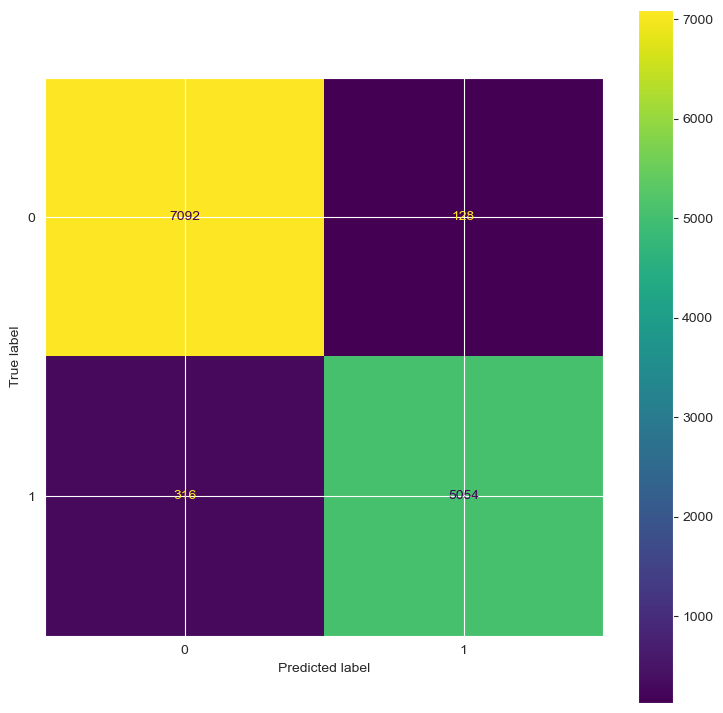

In [92]:
plot_confusion_matrix(model , X_test , y_test)

In [93]:
accuracy_score(y_test , y_pred)#equation of error confusion matrix score 

0.8654487688641779

In [94]:
recall_score(y_test , y_pred)#fn

0.8206703910614526

In [95]:
precision_score(y_test , y_pred)#fp

0.8577267419229272

In [96]:
f1_score(y_test , y_pred)

0.8387894937190712

In [97]:
fbeta_score(y_test , y_pred , beta=0.5)#0.5 focus on percesion

0.8500501504513541

In [98]:
fbeta_score(y_test , y_pred , beta=2)#2 focus on recall

0.8278232774814036